##### GenAI coding with SVM ML model

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm


%matplotlib inline

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmedibrahemsa/recipes-muffins-cupcakes-in-svm")

print("Path to dataset files:", path)

Path to dataset files: /home/arifuz/.cache/kagglehub/datasets/ahmedibrahemsa/recipes-muffins-cupcakes-in-svm/versions/1


In [16]:
DATA_DIR = path + '/recipes_muffins_cupcakes.csv'
recipes = pd.read_csv(DATA_DIR)
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


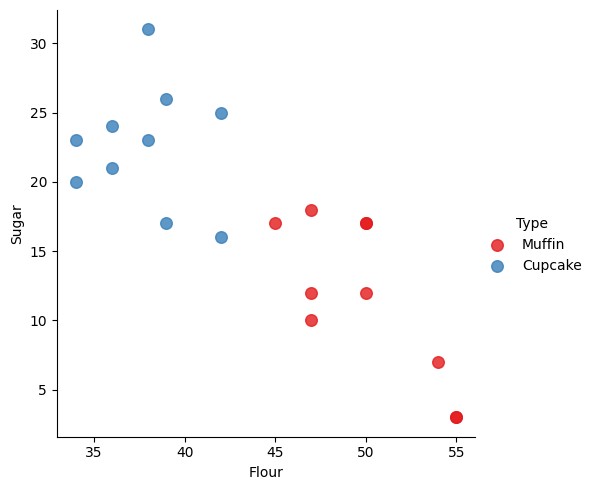

In [19]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [24]:
type_label = np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [26]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [28]:
#Math behind the model
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx  - (model.intercept_[0]) / w[1]